In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Chargement du fichier CSV :
file_path = "data.csv"
df = pd.read_csv(file_path)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9564 non-null   int64  
 1   rowid              9564 non-null   int64  
 2   kepid              9564 non-null   int64  
 3   kepoi_name         9564 non-null   object 
 4   kepler_name        2294 non-null   object 
 5   koi_disposition    9564 non-null   object 
 6   koi_pdisposition   9564 non-null   object 
 7   koi_score          8054 non-null   float64
 8   koi_fpflag_nt      9564 non-null   int64  
 9   koi_fpflag_ss      9564 non-null   int64  
 10  koi_fpflag_co      9564 non-null   int64  
 11  koi_fpflag_ec      9564 non-null   int64  
 12  koi_period         9564 non-null   float64
 13  koi_period_err1    9110 non-null   float64
 14  koi_period_err2    9110 non-null   float64
 15  koi_time0bk        9564 non-null   float64
 16  koi_time0bk_err1   9110 

In [7]:
value_counts = df['koi_disposition'].value_counts()

print(value_counts)

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64


In [9]:
print(df.shape)

(9564, 51)


In [11]:
# Afficher les premières lignes du dataset
display(df.head())

,Unnamed: 0,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [13]:
# Afficher des informations générales sur le dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9564 non-null   int64  
 1   rowid              9564 non-null   int64  
 2   kepid              9564 non-null   int64  
 3   kepoi_name         9564 non-null   object 
 4   kepler_name        2294 non-null   object 
 5   koi_disposition    9564 non-null   object 
 6   koi_pdisposition   9564 non-null   object 
 7   koi_score          8054 non-null   float64
 8   koi_fpflag_nt      9564 non-null   int64  
 9   koi_fpflag_ss      9564 non-null   int64  
 10  koi_fpflag_co      9564 non-null   int64  
 11  koi_fpflag_ec      9564 non-null   int64  
 12  koi_period         9564 non-null   float64
 13  koi_period_err1    9110 non-null   float64
 14  koi_period_err2    9110 non-null   float64
 15  koi_time0bk        9564 non-null   float64
 16  koi_time0bk_err1   9110 

In [15]:
# Statistiques descriptives
display(df.describe())


,Unnamed: 0,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4781.500000,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,0.000000,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2390.750000,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4781.500000,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7172.250000,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9563.000000,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [17]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

Unnamed: 0              0
rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_deli

La variable cible est 'koi_disposition' pour un modèle catégoriel qui identifie l’existence d’un système solaire qui contient une exoplanète.
Dans la base des données originale la variable catégorielle 'koi_disposition' a trois valeurs :
1.	Confirmed
2.	False positive
3.	Candidate
On va couper la base de données dans deux, une data frame qui continent les données connues avec les valeurs ‘Confirmed’ and ‘False positive’ et une base de données contenant les données qui n’ont été traitées encore, étiquetées ‘Candidate’.



In [20]:
koi_disposition_description = df['koi_disposition'].describe()
print(koi_disposition_description)


count               9564
unique                 3
top       FALSE POSITIVE
freq                5023
Name: koi_disposition, dtype: object


In [22]:
df.duplicated().sum()

0

In [26]:
df_candidate = df[df['koi_disposition'] == 'CANDIDATE']
df_connues = df[df['koi_disposition'] != 'CANDIDATE']

In [28]:
print(df_candidate.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2248 entries, 37 to 9561
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2248 non-null   int64  
 1   rowid              2248 non-null   int64  
 2   kepid              2248 non-null   int64  
 3   kepoi_name         2248 non-null   object 
 4   kepler_name        0 non-null      object 
 5   koi_disposition    2248 non-null   object 
 6   koi_pdisposition   2248 non-null   object 
 7   koi_score          1797 non-null   float64
 8   koi_fpflag_nt      2248 non-null   int64  
 9   koi_fpflag_ss      2248 non-null   int64  
 10  koi_fpflag_co      2248 non-null   int64  
 11  koi_fpflag_ec      2248 non-null   int64  
 12  koi_period         2248 non-null   float64
 13  koi_period_err1    2171 non-null   float64
 14  koi_period_err2    2171 non-null   float64
 15  koi_time0bk        2248 non-null   float64
 16  koi_time0bk_err1   2171 non-

In [30]:
# Statistiques descriptives
display(df_candidate.describe())

,Unnamed: 0,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2248.000000,2248.000000,2.248000e+03,1797.000000,2248.0,2248.000000,2248.0,2248.0,2248.000000,2171.000000,...,2177.000000,2185.000000,2177.000000,2177.000000,2185.000000,2177.000000,2177.000000,2248.000000,2248.000000,2248.000000
mean,4952.383007,4953.383007,7.793189e+06,0.900210,0.0,0.014235,0.0,0.0,130.523850,0.002226,...,-153.667892,4.331481,0.114793,-0.144638,1.566311,0.328438,-0.322340,291.789595,43.949490,14.338148
std,2609.690437,2609.690437,2.645967e+06,0.182814,0.0,0.118484,0.0,0.0,2744.156397,0.007347,...,61.521005,0.390857,0.127633,0.091472,5.875146,0.589618,1.830117,4.827846,3.603497,1.310909
min,37.000000,38.000000,1.026957e+06,0.001000,0.0,0.000000,0.0,0.0,0.259820,0.000000,...,-941.000000,0.114000,0.000000,-1.207000,0.109000,0.000000,-76.199000,280.314880,36.743610,7.748000
25%,2699.500000,2700.500000,5.724416e+06,0.898000,0.0,0.000000,0.0,0.0,5.107533,0.000028,...,-192.000000,4.248000,0.042000,-0.200000,0.826000,0.129000,-0.217000,288.034697,40.993062,13.570000
50%,4696.500000,4697.500000,8.105558e+06,0.987000,0.0,0.000000,0.0,0.0,13.278651,0.000118,...,-154.000000,4.444000,0.067000,-0.125000,0.990000,0.244000,-0.107000,292.117185,43.963123,14.650000
75%,7096.250000,7097.250000,9.896018e+06,1.000000,0.0,0.000000,0.0,0.0,59.303747,0.000701,...,-102.000000,4.544000,0.141000,-0.085000,1.286000,0.357000,-0.068000,295.640205,46.754638,15.367500
max,9561.000000,9562.000000,1.288521e+07,1.000000,0.0,1.000000,0.0,0.0,129995.778400,0.141600,...,0.000000,5.364000,1.232000,0.000000,152.969000,15.454000,0.000000,301.661800,52.220341,17.305000


In [32]:
# Vérifier les valeurs manquantes
print(df_candidate.isnull().sum())
value_counts = df_connues['koi_disposition'].value_counts()

print(value_counts)

Unnamed: 0              0
rowid                   0
kepid                   0
kepoi_name              0
kepler_name          2248
koi_disposition         0
koi_pdisposition        0
koi_score             451
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1        77
koi_period_err2        77
koi_time0bk             0
koi_time0bk_err1       77
koi_time0bk_err2       77
koi_impact             63
koi_impact_err1        77
koi_impact_err2        77
koi_duration            0
koi_duration_err1      77
koi_duration_err2      77
koi_depth              63
koi_depth_err1         77
koi_depth_err2         77
koi_prad               63
koi_prad_err1          63
koi_prad_err2          63
koi_teq                63
koi_teq_err1         2248
koi_teq_err2         2248
koi_insol              62
koi_insol_err1         62
koi_insol_err2         62
koi_model_snr          63
koi_tce_plnt_num       67
koi_tce_deli

In [34]:
# Élimination des lignes contenant des possible bruits
# Les variables qui verifient l'existence des anomalies sont:
#‘koi_fpflag_nt’ , ‘koi_fpflag_ss  ', ‘koi_fpflag_co’ et  koi_fpflag_ec’’.
columns_to_check = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_ec', 'koi_fpflag_co']
mask = (df_candidate['koi_fpflag_nt'] == 1) | (df_candidate['koi_fpflag_ss'] == 1) | (df_candidate['koi_fpflag_ec'] == 1) | (df_candidate['koi_fpflag_co'] == 1)
df1 = df_candidate[~mask]
#df1 = df_connues[mask]
display(df1.describe())

,Unnamed: 0,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2216.000000,2216.000000,2.216000e+03,1765.000000,2216.0,2216.0,2216.0,2216.0,2216.000000,2139.000000,...,2145.000000,2153.000000,2145.000000,2145.000000,2153.000000,2145.000000,2145.000000,2216.000000,2216.000000,2216.000000
mean,4950.889892,4951.889892,7.786411e+06,0.903575,0.0,0.0,0.0,0.0,132.375662,0.002260,...,-153.250350,4.332074,0.113846,-0.144536,1.570422,0.328626,-0.322310,291.783333,43.941701,14.342144
std,2604.617345,2604.617345,2.651259e+06,0.180610,0.0,0.0,0.0,0.0,2763.864059,0.007397,...,61.569122,0.392140,0.126500,0.091779,5.917996,0.593414,1.843219,4.826566,3.609495,1.312651
min,37.000000,38.000000,1.026957e+06,0.001000,0.0,0.0,0.0,0.0,0.259820,0.000000,...,-941.000000,0.114000,0.000000,-1.207000,0.109000,0.000000,-76.199000,280.314880,36.743610,7.748000
25%,2702.500000,2703.500000,5.710028e+06,0.903000,0.0,0.0,0.0,0.0,5.367994,0.000031,...,-192.000000,4.248000,0.042000,-0.201000,0.824000,0.127000,-0.216000,288.025970,40.986140,13.572750
50%,4690.500000,4691.500000,8.102179e+06,0.988000,0.0,0.0,0.0,0.0,13.797948,0.000125,...,-154.000000,4.445000,0.066000,-0.123000,0.989000,0.242000,-0.106000,292.093320,43.954605,14.656500
75%,7082.750000,7083.750000,9.894106e+06,1.000000,0.0,0.0,0.0,0.0,61.580106,0.000713,...,-101.000000,4.545000,0.137000,-0.085000,1.285000,0.356000,-0.068000,295.649595,46.753259,15.371250
max,9561.000000,9562.000000,1.288521e+07,1.000000,0.0,0.0,0.0,0.0,129995.778400,0.141600,...,0.000000,5.364000,1.232000,0.000000,152.969000,15.454000,0.000000,301.661800,52.220341,17.305000


In [36]:
value_counts = df1['koi_disposition'].value_counts()

print(value_counts)

koi_disposition
CANDIDATE    2216
Name: count, dtype: int64


Enlever les colonnes 'koi_disposition' `kepler_name`, `koi_teq_err1` et `koi_teq_err2`parce que le nombre des valeurs manquantes est majoritaire.

On va enlever aussi les colonnes reliées au temps de lènregistrement des données`koi_time0bk`  `koi_time0bk_err1` et `koi_time0bk_err2`.
On va aussi éliminer les variables de type objet indiquant different nommes:'koi_pdisposition', 'kepoi_name', 'kepler_name', 'koi_tce_delivname'. Nous n'avons pas besoin des variables représentant les nombre d'identification: `kepoi_name` et `kepid` qui sont de type numérique.
Les variables qui verifient l'existence des anomalies. ‘koi_fpflag_nt’ , ‘koi_fpflag_ss  ', ‘koi_fpflag_co’ et  koi_fpflag_ec’’ ont maintenant la valeur 0, alors on va les eliminer aussi.

In [38]:


columns_to_drop = ['koi_disposition','Unnamed: 0', 'kepler_name', 'koi_teq_err1', 'koi_teq_err2','rowid' ,'kepid','koi_time0bk', 'koi_time0bk_err1','koi_time0bk_err2', 'koi_pdisposition', 'kepoi_name', 'kepler_name', 'koi_tce_delivname','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_ec', 'koi_fpflag_co']



df3 = df1.drop(columns=columns_to_drop)
print(df3.isnull().sum())
df3.info()


koi_score            451
koi_period             0
koi_period_err1       77
koi_period_err2       77
koi_impact            63
koi_impact_err1       77
koi_impact_err2       77
koi_duration           0
koi_duration_err1     77
koi_duration_err2     77
koi_depth             63
koi_depth_err1        77
koi_depth_err2        77
koi_prad              63
koi_prad_err1         63
koi_prad_err2         63
koi_teq               63
koi_insol             62
koi_insol_err1        62
koi_insol_err2        62
koi_model_snr         63
koi_tce_plnt_num      67
koi_steff             63
koi_steff_err1        71
koi_steff_err2        71
koi_slogg             63
koi_slogg_err1        71
koi_slogg_err2        71
koi_srad              63
koi_srad_err1         71
koi_srad_err2         71
ra                     0
dec                    0
koi_kepmag             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 37 to 9561
Data columns (total 34 columns):
 #   Column             Non-Null C

Parce-que la base des données n’est pas balancée, on doit remplacer toutes les valeurs manquantes même si le pourcentage des valeurs manquantes est moins de 5% pour toutes les variables.
On peut voir que pour toutes les variables on peut utiliser le mode comme méthode de remplacement des valeurs nulles.

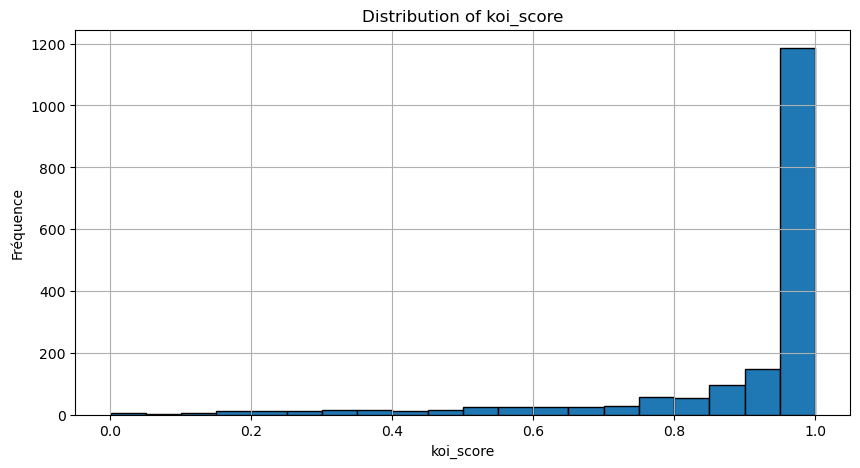

In [41]:
# Histogramme pour koi_score
plt.figure(figsize=(10,5))
plt.hist(df3['koi_score'], bins=20, edgecolor ='k')
plt.title('Distribution of koi_score')
plt.xlabel('koi_score')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [43]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 37 to 9561
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_score          1765 non-null   float64
 1   koi_period         2216 non-null   float64
 2   koi_period_err1    2139 non-null   float64
 3   koi_period_err2    2139 non-null   float64
 4   koi_impact         2153 non-null   float64
 5   koi_impact_err1    2139 non-null   float64
 6   koi_impact_err2    2139 non-null   float64
 7   koi_duration       2216 non-null   float64
 8   koi_duration_err1  2139 non-null   float64
 9   koi_duration_err2  2139 non-null   float64
 10  koi_depth          2153 non-null   float64
 11  koi_depth_err1     2139 non-null   float64
 12  koi_depth_err2     2139 non-null   float64
 13  koi_prad           2153 non-null   float64
 14  koi_prad_err1      2153 non-null   float64
 15  koi_prad_err2      2153 non-null   float64
 16  koi_teq            2153 non-

In [84]:
df3.to_csv('data_raw.csv')

In [45]:
# Imputation par le mode pour toutes les valeurs manquantes
imputer_mode = SimpleImputer(strategy='most_frequent')
df3.loc[:, 'koi_score'] = imputer_mode.fit_transform(df3[['koi_score']])[:,0]
df3.loc[:, 'koi_period_err1'] = imputer_mode.fit_transform(df3[['koi_period_err1']])[:,0]
df3.loc[:, 'koi_period_err2'] = imputer_mode.fit_transform(df3[['koi_period_err2']])[:,0]
df3.loc[:, 'koi_impact'] = imputer_mode.fit_transform(df3[['koi_impact']])[:,0]
df3.loc[:, 'koi_impact_err1'] = imputer_mode.fit_transform(df3[['koi_impact_err1']])[:,0]
df3.loc[:, 'koi_impact_err2'] = imputer_mode.fit_transform(df3[['koi_impact_err2']])[:,0]
df3.loc[:, 'koi_duration_err1'] = imputer_mode.fit_transform(df3[['koi_duration_err1']])[:,0]
df3.loc[:, 'koi_duration_err2'] = imputer_mode.fit_transform(df3[['koi_duration_err2']])[:,0]
df3.loc[:, 'koi_depth'] = imputer_mode.fit_transform(df3[['koi_depth']])[:,0]
df3.loc[:, 'koi_depth_err1'] = imputer_mode.fit_transform(df3[['koi_depth_err1']])[:,0]
df3.loc[:, 'koi_depth_err2'] = imputer_mode.fit_transform(df3[['koi_depth_err2']])[:,0]
df3.loc[:, 'koi_prad'] = imputer_mode.fit_transform(df3[['koi_prad']])[:,0]
df3.loc[:, 'koi_prad_err1'] = imputer_mode.fit_transform(df3[['koi_prad_err1']])[:,0]
df3.loc[:, 'koi_prad_err2'] = imputer_mode.fit_transform(df3[['koi_prad_err2']])[:,0]
df3.loc[:, 'koi_teq'] = imputer_mode.fit_transform(df3[['koi_teq']])[:,0]
df3.loc[:, 'koi_insol'] = imputer_mode.fit_transform(df3[['koi_insol']])[:,0]
df3.loc[:, 'koi_insol_err1'] = imputer_mode.fit_transform(df3[['koi_insol_err1']])[:,0]
df3.loc[:, 'koi_insol_err2'] = imputer_mode.fit_transform(df3[['koi_insol_err2']])[:,0]
df3.loc[:, 'koi_model_snr'] = imputer_mode.fit_transform(df3[['koi_model_snr']])[:,0]
df3.loc[:, 'koi_slogg'] = imputer_mode.fit_transform(df3[['koi_slogg']])[:,0]
df3.loc[:, 'koi_slogg_err1'] = imputer_mode.fit_transform(df3[['koi_slogg_err1']])[:,0]
df3.loc[:, 'koi_slogg_err2'] = imputer_mode.fit_transform(df3[['koi_slogg_err2']])[:,0]
df3.loc[:, 'koi_steff'] = imputer_mode.fit_transform(df3[['koi_steff']])[:,0]
df3.loc[:, 'koi_steff_err1'] = imputer_mode.fit_transform(df3[['koi_steff_err1']])[:,0]
df3.loc[:, 'koi_steff_err2'] = imputer_mode.fit_transform(df3[['koi_steff_err2']])[:,0]
df3.loc[:, 'koi_srad'] = imputer_mode.fit_transform(df3[['koi_srad']])[:,0]
df3.loc[:, 'koi_srad_err1'] = imputer_mode.fit_transform(df3[['koi_srad_err1']])[:,0]
df3.loc[:, 'koi_srad_err2'] = imputer_mode.fit_transform(df3[['koi_srad_err2']])[:,0]
df3.loc[:, 'koi_tce_plnt_num'] = imputer_mode.fit_transform(df3[['koi_tce_plnt_num']])[:,0]



'''columns_to_convert = [col for col in df3.columns if col != '  koi_disposition']

numerical_df = pd.DataFrame()

# Convert the selected columns to numeric, coercing errors to NaN
for col in columns_to_convert:
    numerical_df[col] = pd.to_numeric(df3[col], errors='coerce')

# If you want to include the excluded column in the final DataFrame as is
numerical_df['your_excluded_column'] = df3['koi_disposition']

# Display the information of the new DataFrame
print(numerical_df.info())

# Display the first few rows of the new DataFrame
#print(numerical_df.head())
print(numerical_df.info())'''

print(df3.info())
print(df3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 37 to 9561
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_score          2216 non-null   float64
 1   koi_period         2216 non-null   float64
 2   koi_period_err1    2216 non-null   float64
 3   koi_period_err2    2216 non-null   float64
 4   koi_impact         2216 non-null   float64
 5   koi_impact_err1    2216 non-null   float64
 6   koi_impact_err2    2216 non-null   float64
 7   koi_duration       2216 non-null   float64
 8   koi_duration_err1  2216 non-null   float64
 9   koi_duration_err2  2216 non-null   float64
 10  koi_depth          2216 non-null   float64
 11  koi_depth_err1     2216 non-null   float64
 12  koi_depth_err2     2216 non-null   float64
 13  koi_prad           2216 non-null   float64
 14  koi_prad_err1      2216 non-null   float64
 15  koi_prad_err2      2216 non-null   float64
 16  koi_teq            2216 non-

In [47]:
display(df3.head(10))
display(df3.describe())

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
37,1.000,4.959319,5.150000e-07,-5.150000e-07,0.831,0.016,-0.004,2.22739,0.0075,-0.0075,...,-77.0,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
58,0.999,40.419504,1.139000e-04,-1.139000e-04,0.911,5.567,-0.118,3.36200,0.1400,-0.1400,...,-163.0,4.507,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487
62,0.993,7.240661,1.617000e-05,-1.617000e-05,1.198,49.850,-0.258,0.55800,0.1710,-0.1710,...,-79.0,4.595,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334
63,0.871,3.435916,4.729000e-05,-4.729000e-05,0.624,0.037,-0.476,3.13300,0.4070,-0.4070,...,-115.0,4.339,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791
72,0.773,1.626630,1.015000e-06,-1.015000e-06,1.260,4.827,-0.043,2.11450,0.0285,-0.0285,...,-172.0,4.410,0.124,-0.186,0.973,0.270,-0.145,294.36819,38.310280,15.279
84,1.000,10.181584,6.188000e-06,-6.188000e-06,0.920,0.007,-0.005,3.50890,0.0331,-0.0331,...,-197.0,4.541,0.048,-0.192,0.836,0.234,-0.078,291.28195,38.241669,15.657
92,1.000,19.620347,3.730000e-06,-3.730000e-06,0.458,0.080,-0.165,2.00380,0.0292,-0.0292,...,-85.0,4.492,0.048,-0.112,0.905,0.121,-0.061,293.81619,38.563568,15.562
94,1.000,9.029307,1.648000e-05,-1.648000e-05,0.024,0.401,-0.024,3.14490,0.0528,-0.0528,...,-167.0,4.526,0.063,-0.108,0.820,0.141,-0.082,290.33362,38.728230,15.387
103,1.000,4.783003,5.432000e-06,-5.432000e-06,0.003,0.425,-0.003,2.33500,0.0332,-0.0332,...,-155.0,4.574,0.026,-0.097,0.807,0.111,-0.060,287.09399,39.060719,15.119
112,1.000,34.843986,4.036000e-05,-4.036000e-05,0.934,0.575,-0.031,2.93150,0.0702,-0.0702,...,-166.0,4.482,0.081,-0.150,0.871,0.196,-0.105,285.92001,39.624828,15.684


,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.923199,132.375662,0.002181,-0.002181,0.512897,1.521193,-0.346947,4.842615,0.437067,-0.437067,...,-150.871390,4.335199,0.111928,-0.143494,1.548178,0.328830,-0.313586,291.783333,43.941701,14.342144
std,0.165789,2763.864059,0.007279,0.007279,1.958427,8.532298,1.325896,4.425976,0.698978,0.698978,...,61.970183,0.386955,0.124902,0.090478,5.834677,0.583827,1.814071,4.826566,3.609495,1.312651
min,0.001000,0.259820,0.000000,-0.141600,0.000000,0.000000,-59.320000,0.052000,0.000990,-13.200000,...,-941.000000,0.114000,0.000000,-1.207000,0.109000,0.000000,-76.199000,280.314880,36.743610,7.748000
25%,0.944000,5.367994,0.000025,-0.000656,0.123000,0.046000,-0.476125,2.135750,0.136000,-0.491250,...,-189.000000,4.258000,0.042750,-0.200000,0.813750,0.132000,-0.207500,288.025970,40.986140,13.572750
50%,0.997000,13.797948,0.000112,-0.000112,0.372000,0.216700,-0.269550,3.460000,0.257000,-0.257000,...,-152.000000,4.442000,0.065000,-0.120000,0.976500,0.251000,-0.102000,292.093320,43.954605,14.656500
75%,1.000000,61.580106,0.000656,-0.000025,0.748000,0.364300,-0.078075,5.797750,0.491250,-0.136000,...,-90.000000,4.541000,0.137000,-0.088000,1.260250,0.351000,-0.065000,295.649595,46.753259,15.371250
max,1.000000,129995.778400,0.141600,0.000000,64.515900,72.990000,0.000000,44.350000,13.200000,-0.000990,...,0.000000,5.364000,1.232000,0.000000,152.969000,15.454000,0.000000,301.661800,52.220341,17.305000


In [49]:
# Vérification des valeurs  outliers
#Selectioner uniquement les collones numeriques
numeric_df = df3.select_dtypes(include=[np.number])

# Calcul de Q1, Q3 et IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
k=1.5


# Identification et comptage des bornes inférieure et supérieure pour les outliers
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Initialiser un dictionaire pour stocker le nombre des outliers par colonne
outlier_counts = {}

# Identification et comptage des outliers par colonne
for column in numeric_df.columns:
    lower_outliners_count = numeric_df[numeric_df[column] < lower_bound[column]][column].count()
    upper_outliners_count = numeric_df[numeric_df[column] > upper_bound[column]][column].count()
    outlier_counts[column] = lower_outliners_count + upper_outliners_count

# Affichage du nombre de valeurs aberrantes par colonne
for column, count in outlier_counts.items():
    print(f"Nombre des outliers dans la colonne '{column}': {count}")

Nombre des outliers dans la colonne 'koi_score': 353
Nombre des outliers dans la colonne 'koi_period': 349
Nombre des outliers dans la colonne 'koi_period_err1': 380
Nombre des outliers dans la colonne 'koi_period_err2': 380
Nombre des outliers dans la colonne 'koi_impact': 9
Nombre des outliers dans la colonne 'koi_impact_err1': 93
Nombre des outliers dans la colonne 'koi_impact_err2': 20
Nombre des outliers dans la colonne 'koi_duration': 173
Nombre des outliers dans la colonne 'koi_duration_err1': 214
Nombre des outliers dans la colonne 'koi_duration_err2': 214
Nombre des outliers dans la colonne 'koi_depth': 225
Nombre des outliers dans la colonne 'koi_depth_err1': 178
Nombre des outliers dans la colonne 'koi_depth_err2': 178
Nombre des outliers dans la colonne 'koi_prad': 297
Nombre des outliers dans la colonne 'koi_prad_err1': 258
Nombre des outliers dans la colonne 'koi_prad_err2': 332
Nombre des outliers dans la colonne 'koi_teq': 86
Nombre des outliers dans la colonne 'koi_ins

In [51]:
for column in numeric_df.columns:

    # Calcul de Q1, Q3 et IQR
    Q1 = df3[column] .quantile(0.25)
    Q3 = df3[column] .quantile(0.75)
    IQR = Q3 - Q1
    k = 1.5

    # Identification et comptage des bornes inférieure et supérieure pour les valeurs aberantes
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR


    df3.loc[df3[column] < lower_bound, column] = lower_bound

    # remplacement des valeurs aberantes supérieures au seuil supérieur

    df3.loc[df3[column] > upper_bound, column] = upper_bound



In [58]:
# Vérification des valeurs  outliers
#Selectioner uniquement les collones numeriques
numeric_df = df3.select_dtypes(include=[np.number])

# Calcul de Q1, Q3 et IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
k = 1.5
# Identification et comptage des bornes inférieure et supérieure pour les outliers
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Initialiser un dictionaire pour stocker le nombre des outliers par colonne
outlier_counts = {}

# Identification et comptage des outliers par colonne
for column in numeric_df.columns:
    lower_outliners_count = numeric_df[numeric_df[column] < lower_bound[column]][column].count()
    upper_outliners_count = numeric_df[numeric_df[column] > upper_bound[column]][column].count()
    outlier_counts[column] = lower_outliners_count + upper_outliners_count

# Affichage du nombre de valeurs aberrantes par colonne
for column, count in outlier_counts.items():
    print(f"Nombre des outliers dans la colonne '{column}': {count}")

Nombre des outliers dans la colonne 'koi_score': 0
Nombre des outliers dans la colonne 'koi_period': 0
Nombre des outliers dans la colonne 'koi_period_err1': 0
Nombre des outliers dans la colonne 'koi_period_err2': 0
Nombre des outliers dans la colonne 'koi_impact': 0
Nombre des outliers dans la colonne 'koi_impact_err1': 0
Nombre des outliers dans la colonne 'koi_impact_err2': 0
Nombre des outliers dans la colonne 'koi_duration': 0
Nombre des outliers dans la colonne 'koi_duration_err1': 0
Nombre des outliers dans la colonne 'koi_duration_err2': 0
Nombre des outliers dans la colonne 'koi_depth': 0
Nombre des outliers dans la colonne 'koi_depth_err1': 0
Nombre des outliers dans la colonne 'koi_depth_err2': 0
Nombre des outliers dans la colonne 'koi_prad': 0
Nombre des outliers dans la colonne 'koi_prad_err1': 0
Nombre des outliers dans la colonne 'koi_prad_err2': 0
Nombre des outliers dans la colonne 'koi_teq': 0
Nombre des outliers dans la colonne 'koi_insol': 0
Nombre des outliers da

In [180]:
# Encoder la variable catégorielle 'koi_disposition' en utilisant un encodage numérique où 'False positive' est représenté par 0 et 'Confirmed' par 1.
label_encoder = LabelEncoder()
df3['koi_disposition'] = label_encoder.fit_transform(df3['koi_disposition']) #Use .loc
def reverse_binary_encoding(df, column_name):

#Reverses the binary encoding (1 and 0) in a DataFrame column using .loc.

   df.loc[:, column_name] = df[column_name].apply(lambda x: 1 - x)  # Use .loc
   return df
df3 = reverse_binary_encoding(df3.copy(), 'koi_disposition')
df3['koi_disposition'] = df3['koi_disposition'].astype(int)

C:\Users\d2s1a\AppData\Local\Temp\ipykernel_24308\4293221329.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, column_name] = df[column_name].apply(lambda x: 1 - x)  # Use .loc


In [56]:
df3.describe()

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.964116,41.972014,0.000444,-0.000444,0.452041,0.230638,-0.297759,4.413830,0.361915,-0.361915,...,-150.199233,4.373713,0.098336,-0.141449,1.094393,0.271504,-0.158856,291.783333,43.941701,14.355810
std,0.053128,52.458421,0.000598,0.000598,0.364511,0.201462,0.232026,3.041909,0.302886,0.302886,...,58.062159,0.246393,0.076580,0.080580,0.399455,0.178908,0.129940,4.826566,3.609495,1.266618
min,0.860000,0.259820,0.000000,-0.001601,0.000000,0.000000,-1.073200,0.052000,0.000990,-1.024125,...,-337.500000,3.833500,0.000000,-0.368000,0.144000,0.000000,-0.421250,280.314880,36.743610,10.875000
25%,0.944000,5.367994,0.000025,-0.000656,0.123000,0.046000,-0.476125,2.135750,0.136000,-0.491250,...,-189.000000,4.258000,0.042750,-0.200000,0.813750,0.132000,-0.207500,288.025970,40.986140,13.572750
50%,0.997000,13.797948,0.000112,-0.000112,0.372000,0.216700,-0.269550,3.460000,0.257000,-0.257000,...,-152.000000,4.442000,0.065000,-0.120000,0.976500,0.251000,-0.102000,292.093320,43.954605,14.656500
75%,1.000000,61.580106,0.000656,-0.000025,0.748000,0.364300,-0.078075,5.797750,0.491250,-0.136000,...,-90.000000,4.541000,0.137000,-0.088000,1.260250,0.351000,-0.065000,295.649595,46.753259,15.371250
max,1.000000,145.898274,0.001601,0.000000,1.685500,0.841750,0.000000,11.290750,1.024125,-0.000990,...,0.000000,4.965500,0.278375,0.000000,1.930000,0.679500,0.000000,301.661800,52.220341,17.305000


In [193]:

target_correlations = abs(corr_matrix['koi_disposition'])
ordered_variables = target_correlations.sort_values(ascending=False).drop('koi_disposition').index

print("Ordered Variables (by absolute correlation with 'koi_disposition'):")
#print(ordered_variables)
print(f"\nCorrelations avec {'koi_disposition'}:")
target_correlations.sort_values(ascending=False)


Ordered Variables (by absolute correlation with 'koi_disposition'):

Correlations avec koi_disposition:


koi_disposition      1.000000
koi_period_err2      0.243674
koi_model_snr        0.219569
koi_slogg_err2       0.184613
koi_impact_err2      0.179444
koi_depth            0.178787
koi_score            0.173694
koi_duration_err1    0.169851
koi_duration_err2    0.169851
koi_insol            0.161682
koi_insol_err1       0.159287
koi_impact_err1      0.142717
koi_prad             0.138452
koi_tce_plnt_num     0.134229
koi_srad_err2        0.121167
koi_impact           0.120935
koi_duration         0.107254
koi_insol_err2       0.106486
koi_period           0.097475
koi_prad_err2        0.088498
koi_srad             0.087378
koi_depth_err2       0.077949
koi_depth_err1       0.077949
koi_teq              0.051760
koi_slogg_err1       0.046203
koi_steff            0.044206
koi_slogg            0.042568
koi_kepmag           0.042195
ra                   0.040811
koi_prad_err1        0.024738
koi_srad_err1        0.021094
koi_steff_err1       0.013769
koi_period_err1      0.011851
koi_steff_

In [71]:
Predictors_target = ['koi_score', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_tce_plnt_num', 'koi_steff_err1', 'koi_steff_err2', 'ra', 'dec']

Maintenant on va garder seulement les collones des predicteurs et la variable cible de la base de données df1:

In [74]:
df_predict = df3[Predictors_target]
print(df_predict.info())
display(df_predict.head())
display(df_predict.describe())
print(df_predict.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 37 to 9561
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_score         2216 non-null   float64
 1   koi_impact        2216 non-null   float64
 2   koi_impact_err1   2216 non-null   float64
 3   koi_impact_err2   2216 non-null   float64
 4   koi_tce_plnt_num  2216 non-null   float64
 5   koi_steff_err1    2216 non-null   float64
 6   koi_steff_err2    2216 non-null   float64
 7   ra                2216 non-null   float64
 8   dec               2216 non-null   float64
dtypes: float64(9)
memory usage: 173.1 KB
None


,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
37,1.000,0.831,0.01600,-0.004,1.0,77.0,-77.0,292.16705,48.727589
58,0.999,0.911,0.84175,-0.118,1.0,179.0,-163.0,294.31686,50.080231
62,0.993,1.198,0.84175,-0.258,1.0,79.0,-79.0,293.83331,50.230350
63,0.871,0.624,0.03700,-0.476,1.0,104.0,-115.0,287.88733,46.276241
72,0.860,1.260,0.84175,-0.043,1.0,155.0,-172.0,294.36819,38.310280


,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.00000,2216.000000,2216.000000,2216.000000
mean,0.964116,0.452041,0.230638,-0.297759,1.0,139.71796,-150.199233,291.783333,43.941701
std,0.053128,0.364511,0.201462,0.232026,0.0,43.57736,58.062159,4.826566,3.609495
min,0.860000,0.000000,0.000000,-1.073200,1.0,0.00000,-337.500000,280.314880,36.743610
25%,0.944000,0.123000,0.046000,-0.476125,1.0,100.00000,-189.000000,288.025970,40.986140
50%,0.997000,0.372000,0.216700,-0.269550,1.0,155.00000,-152.000000,292.093320,43.954605
75%,1.000000,0.748000,0.364300,-0.078075,1.0,170.00000,-90.000000,295.649595,46.753259
max,1.000000,1.685500,0.841750,0.000000,1.0,275.00000,0.000000,301.661800,52.220341


koi_score           0
koi_impact          0
koi_impact_err1     0
koi_impact_err2     0
koi_tce_plnt_num    0
koi_steff_err1      0
koi_steff_err2      0
ra                  0
dec                 0
dtype: int64


In [76]:
#Normaliser  using MinMaxScaler les variables koi_steff_err1, koi_steff_err2, ra et dec
columns_to_normalize = ['koi_steff_err1', 'koi_steff_err2', 'ra', 'dec']
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_predict[columns_to_normalize])
df_predict[columns_to_normalize]=normalized_data
print(df_predict[columns_to_normalize].head())
display(df_predict.head())

    koi_steff_err1  koi_steff_err2        ra       dec
37        0.280000        0.771852  0.555217  0.774322
58        0.650909        0.517037  0.655925  0.861721
62        0.287273        0.765926  0.633273  0.871420
63        0.378182        0.659259  0.354733  0.615933
72        0.563636        0.490370  0.658330  0.101227


C:\Users\d2s1a\AppData\Local\Temp\ipykernel_14892\2539748810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[columns_to_normalize]=normalized_data


,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
37,1.000,0.831,0.01600,-0.004,1.0,0.280000,0.771852,0.555217,0.774322
58,0.999,0.911,0.84175,-0.118,1.0,0.650909,0.517037,0.655925,0.861721
62,0.993,1.198,0.84175,-0.258,1.0,0.287273,0.765926,0.633273,0.871420
63,0.871,0.624,0.03700,-0.476,1.0,0.378182,0.659259,0.354733,0.615933
72,0.860,1.260,0.84175,-0.043,1.0,0.563636,0.490370,0.658330,0.101227


Test d'hypothèse
L'hypothèse nulle (H0) et l'hypothèse alternative (H1) pour tester si les valeurs de koi_disposition  diffèrent significativement fonction des valeurs du predicteur 'koi_impact'

In [78]:
df_predict.to_csv('data_deploy.csv')

In [80]:
print(df_predict.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 37 to 9561
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_score         2216 non-null   float64
 1   koi_impact        2216 non-null   float64
 2   koi_impact_err1   2216 non-null   float64
 3   koi_impact_err2   2216 non-null   float64
 4   koi_tce_plnt_num  2216 non-null   float64
 5   koi_steff_err1    2216 non-null   float64
 6   koi_steff_err2    2216 non-null   float64
 7   ra                2216 non-null   float64
 8   dec               2216 non-null   float64
dtypes: float64(9)
memory usage: 173.1 KB
None


In [82]:
display(df_predict.describe())

,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.964116,0.452041,0.230638,-0.297759,1.0,0.508065,0.554965,0.537242,0.465091
std,0.053128,0.364511,0.201462,0.232026,0.0,0.158463,0.172036,0.226101,0.233221
min,0.860000,0.000000,0.000000,-1.073200,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.944000,0.123000,0.046000,-0.476125,1.0,0.363636,0.440000,0.361227,0.274123
50%,0.997000,0.372000,0.216700,-0.269550,1.0,0.563636,0.549630,0.551763,0.465925
75%,1.000000,0.748000,0.364300,-0.078075,1.0,0.618182,0.733333,0.718357,0.646755
max,1.000000,1.685500,0.841750,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
